In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from NeuralNetFuncs import preprocess_data, create_model
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('train.csv')
pciat_columns = [col for col in df.columns if 'PCIAT-PCIAT' in col]
df = df.drop(columns=pciat_columns)
print(df.head())

         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PAQ_A-PAQ_A_Total  PAQ_C-Season  PAQ_

In [ ]:
# Preprocess data
X, y = preprocess_data(df)

# First split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features using only training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Apply PCA using only training data
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled) 
# Convert to DataFrames
X_train_df = pd.DataFrame(
    X_train_pca,
    columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]
)

X_val_df = pd.DataFrame(
    X_val_pca,
    columns=[f'PC{i+1}' for i in range(X_val_pca.shape[1])]
)



# Convert targets to categorical
y_train_cat = to_categorical(y_train_resampled, num_classes=4)
y_val_cat = to_categorical(y_val, num_classes=4)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -3.685808  0.365580  1.513844 -0.557086 -2.735287  2.018432  1.888022   
1    -1.510903 -0.676389  0.313244 -0.437976 -1.147098  1.281183 -0.032313   
2    -5.090349 -2.007899  3.781410 -0.400749  2.408683 -2.786271 -1.271022   
3    -1.066148 -0.479033 -0.163548 -1.445878  0.434594  0.127327 -0.839644   
4    -0.209611 -0.101321 -0.123264 -0.694162  0.909159  1.573932  1.079984   
...        ...       ...       ...       ...       ...       ...       ...   
5027  1.923964  2.524158  0.938433 -2.051517 -1.451526  1.591613 -0.959678   
5028  7.605478  4.687524  1.857898  2.291448 -2.709162 -2.181858  0.890991   
5029  5.487122  0.819260 -0.601589 -0.944500  0.022016  1.422174  0.039784   
5030  2.376354  3.562526  2.265141 -5.166597 -2.972000  1.254447 -3.912509   
5031  1.207396  2.809829  0.237983 -1.219144 -2.141105  5.814436  0.497510   

           PC8       PC9      PC10  ...      PC22      PC23    

In [5]:
# Train model
model = create_model(X_train_df.shape[1])
history = model.fit(
    X_train_df, 
    y_train_cat,
    validation_data=(X_val_df, y_val_cat),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200


/Users/eric/Desktop/Autodesk/HealthPrediction/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.3397 - loss: 2.1621 - val_accuracy: 0.5547 - val_loss: 1.7693
Epoch 2/200
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5284 - loss: 1.6032 - val_accuracy: 0.5566 - val_loss: 1.4281
Epoch 3/200
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.6003 - loss: 1.3372 - val_accuracy: 0.5383 - val_loss: 1.3321
Epoch 4/200
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.6205 - loss: 1.1787 - val_accuracy: 0.5347 - val_loss: 1.2848
Epoch 5/200
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.6381 - loss: 1.0675 - val_accuracy: 0.5347 - val_loss: 1.1894
Epoch 6/200
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.6513 - loss: 0.9939 - val_accuracy: 0.5639 - val_loss: 1.2409
Epoch 7/200
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.6621 - loss: 0.9659 - val_accuracy: 0.5456 - val_loss: 1.1089
Epoch 8/200
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.6674 - loss: 0.9136 - val_

In [6]:
# Evaluate
y_train_pred = np.argmax(model.predict(X_train_df), axis=1)
y_val_pred = np.argmax(model.predict(X_val_df), axis=1)
y_train_true = np.argmax(y_train_cat, axis=1)
y_val_true = np.argmax(y_val_cat, axis=1)

# Calculate accuracy
train_accuracy = (y_train_pred == y_train_true).mean()
val_accuracy = (y_val_pred == y_val_true).mean()

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step

Training Accuracy: 0.8595
Validation Accuracy: 0.5730


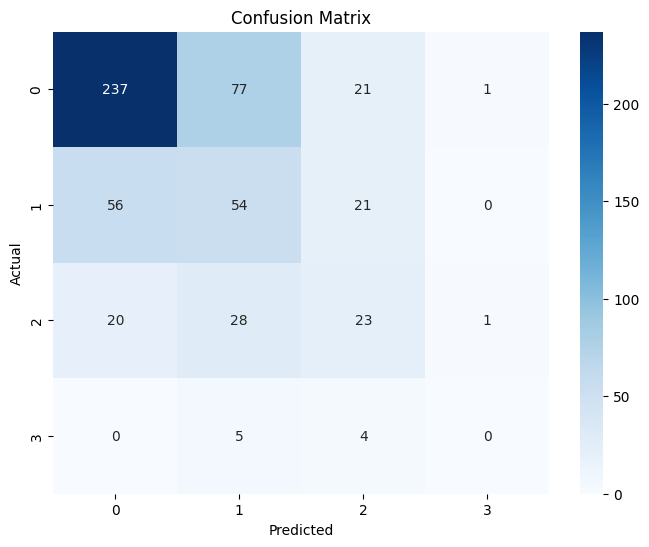


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       336
           1       0.33      0.41      0.37       131
           2       0.33      0.32      0.33        72
           3       0.00      0.00      0.00         9

    accuracy                           0.57       548
   macro avg       0.35      0.36      0.36       548
weighted avg       0.59      0.57      0.58       548



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val_true, y_val_pred))